# Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
from imblearn.over_sampling import SMOTE 
from sklearn import preprocessing

# Loading the dataset

In [2]:
df=pd.read_csv("HCV-Egypt-Data.csv")
df

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,...,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline histological Grading,Baselinehistological staging
0,56,1,35,2,1,1,1,2,2,2,...,5,5,5,655330,634536,288194,5,5,13,2
1,46,1,29,1,2,2,1,2,2,1,...,57,123,44,40620,538635,637056,336804,31085,4,2
2,57,1,33,2,2,2,2,1,1,1,...,5,5,5,571148,661346,5,735945,558829,4,4
3,49,2,33,1,2,1,2,1,2,1,...,48,77,33,1041941,449939,585688,744463,582301,10,3
4,59,1,32,1,1,2,1,2,2,2,...,94,90,30,660410,738756,3731527,338946,242861,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1380,44,1,29,1,2,2,2,1,1,1,...,63,44,45,387795,55938,5,5,5,15,4
1381,55,1,34,1,2,2,1,1,1,1,...,97,64,41,481378,152961,393339,73574,236273,10,2
1382,42,1,26,2,2,1,1,1,2,1,...,87,39,24,612664,572756,806109,343719,160457,6,2
1383,52,1,29,2,1,1,2,2,2,1,...,48,81,43,139872,76161,515730,2460,696074,15,3


In [3]:
df.head()

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,...,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline histological Grading,Baselinehistological staging
0,56,1,35,2,1,1,1,2,2,2,...,5,5,5,655330,634536,288194,5,5,13,2
1,46,1,29,1,2,2,1,2,2,1,...,57,123,44,40620,538635,637056,336804,31085,4,2
2,57,1,33,2,2,2,2,1,1,1,...,5,5,5,571148,661346,5,735945,558829,4,4
3,49,2,33,1,2,1,2,1,2,1,...,48,77,33,1041941,449939,585688,744463,582301,10,3
4,59,1,32,1,1,2,1,2,2,2,...,94,90,30,660410,738756,3731527,338946,242861,11,1


> The Hepatitis C dataset contains 1389 rows and 29 columns.
The last column "Baselinehistologicla Staging" is the target variable.
The 2nd column "Gender" shows the Male and Female as 1 and 2 respectively.
For the rest of the categorical columns "Fever","Nausea/Vomiting","Headache","Diarrhea","Fatigue & generalized bone ache"
"Jaundice","Epigastric pain" 1 shows absent and 2 shows present of that particular symptom.

>The columns are abbreviated as:
WBC : White blood cell 
RBC : Red blood cells 
HGB : Hemoglobin 
Plat : Platelets 

>AST 1 : Aspartate transaminase ratio
ALT 1 : Alanine transaminase ratio 1 week 
ALT 4 : Alanine transaminase ratio 4 weeks  
ALT 12 : Alanine transaminase ratio 12 weeks 
ALT 24 : Alanine transaminase ratio 24 weeks
ALT 36 : Alanine transaminase ratio 36 weeks
ALT 48 : Alanine transaminase ratio 48 weeks
ALT after 24 w : Alanine transaminase ratio 24 weeks (after 24 warnings alanine transaminase ratio 24 weeks)

>RNA Base : Ribonucleic Acid Base
RNA 4 : RNA 4 
RNA 12 : RNA 12
RNA EOT : RNA end-of-treatment
RNA EF : RNA Elongation Factor
Baseline histological Grading : Baseline histological Grading 

>The last column "Baselinehistologicla Staging" is the target variable.
1: Portal fibrosis without septa:
2: Few septa
3: Numerous septa without cirrhosis
4: Cirrhosis

# Information about the dataset

In [4]:
df.columns

Index(['Age ', 'Gender', 'BMI', 'Fever', 'Nausea/Vomting', 'Headache ',
       'Diarrhea ', 'Fatigue & generalized bone ache ', 'Jaundice ',
       'Epigastric pain ', 'WBC', 'RBC', 'HGB', 'Plat', 'AST 1', 'ALT 1',
       'ALT4', 'ALT 12', 'ALT 24', 'ALT 36', 'ALT 48', 'ALT after 24 w',
       'RNA Base', 'RNA 4', 'RNA 12', 'RNA EOT', 'RNA EF',
       'Baseline histological Grading', 'Baselinehistological staging'],
      dtype='object')

In [5]:
df.nunique()

Age                                   30
Gender                                 2
BMI                                   14
Fever                                  2
Nausea/Vomting                         2
Headache                               2
Diarrhea                               2
Fatigue & generalized bone ache        2
Jaundice                               2
Epigastric pain                        2
WBC                                 1305
RBC                                 1384
HGB                                    6
Plat                                1375
AST 1                                 90
ALT 1                                 90
ALT4                                  90
ALT 12                                90
ALT 24                                90
ALT 36                                91
ALT 48                                91
ALT after 24 w                        25
RNA Base                            1384
RNA 4                               1384
RNA 12          

In [6]:
df.shape

(1385, 29)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1385 entries, 0 to 1384
Data columns (total 29 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age                               1385 non-null   int64  
 1   Gender                            1385 non-null   int64  
 2   BMI                               1385 non-null   int64  
 3   Fever                             1385 non-null   int64  
 4   Nausea/Vomting                    1385 non-null   int64  
 5   Headache                          1385 non-null   int64  
 6   Diarrhea                          1385 non-null   int64  
 7   Fatigue & generalized bone ache   1385 non-null   int64  
 8   Jaundice                          1385 non-null   int64  
 9   Epigastric pain                   1385 non-null   int64  
 10  WBC                               1385 non-null   int64  
 11  RBC                               1385 non-null   float64
 12  HGB   

In [8]:
df.describe()

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,...,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline histological Grading,Baselinehistological staging
count,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,...,1385.000000,1385.000000,1385.000000,1.385000e+03,1.385000e+03,1.385000e+03,1385.000000,1385.000000,1385.000000,1385.000000
mean,46.319134,1.489531,28.608664,1.515523,1.502527,1.496029,1.502527,1.498917,1.501083,1.503971,...,83.117690,83.629603,33.438267,5.909512e+05,6.008956e+05,2.887536e+05,287660.336462,291378.290975,9.761733,2.536462
std,8.781506,0.500071,4.076215,0.499939,0.500174,0.500165,0.500174,0.500179,0.500179,0.500165,...,26.399031,26.223955,7.073569,3.539354e+05,3.623151e+05,2.853507e+05,264559.525070,267700.691713,4.023896,1.121392
min,32.000000,1.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,5.000000,5.000000,1.100000e+01,5.000000e+00,5.000000e+00,5.000000,5.000000,3.000000,1.000000
25%,39.000000,1.000000,25.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,61.000000,61.000000,28.000000,2.692530e+05,2.708930e+05,5.000000e+00,5.000000,5.000000,6.000000,2.000000
50%,46.000000,1.000000,29.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,...,84.000000,83.000000,34.000000,5.931030e+05,5.978690e+05,2.343590e+05,251376.000000,244049.000000,10.000000,3.000000
75%,54.000000,2.000000,32.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,106.000000,106.000000,40.000000,8.867910e+05,9.090930e+05,5.248190e+05,517806.000000,527864.000000,13.000000,4.000000
max,61.000000,2.000000,35.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,128.000000,128.000000,45.000000,1.201086e+06,1.201715e+06,3.731527e+06,808450.000000,810333.000000,16.000000,4.000000


In [9]:
df.isnull().sum()

Age                                 0
Gender                              0
BMI                                 0
Fever                               0
Nausea/Vomting                      0
Headache                            0
Diarrhea                            0
Fatigue & generalized bone ache     0
Jaundice                            0
Epigastric pain                     0
WBC                                 0
RBC                                 0
HGB                                 0
Plat                                0
AST 1                               0
ALT 1                               0
ALT4                                0
ALT 12                              0
ALT 24                              0
ALT 36                              0
ALT 48                              0
ALT after 24 w                      0
RNA Base                            0
RNA 4                               0
RNA 12                              0
RNA EOT                             0
RNA EF      

In [10]:
df.duplicated().sum()

0

# EDA

# UNIVARIATE ANALYSIS

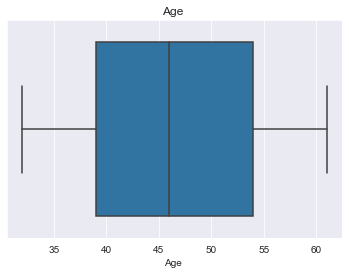

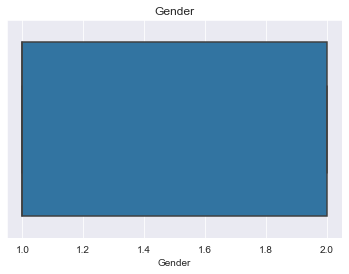

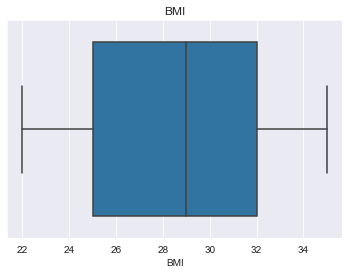

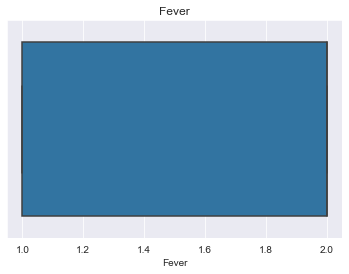

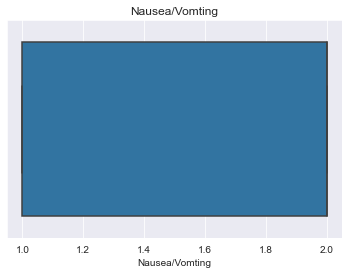

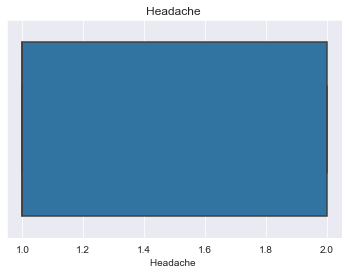

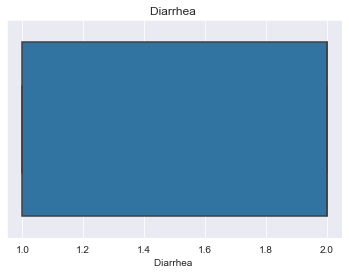

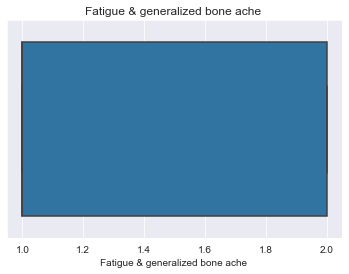

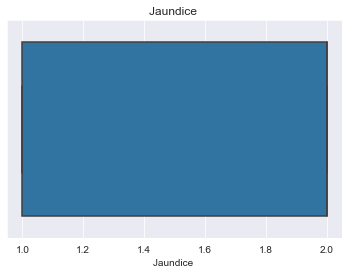

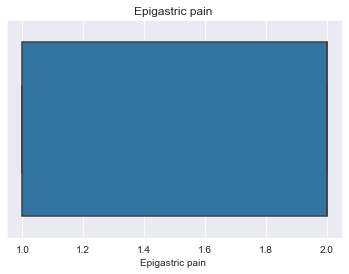

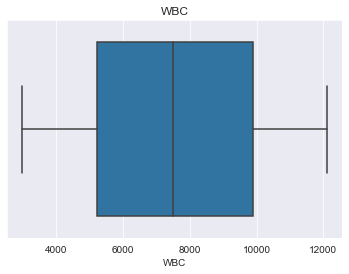

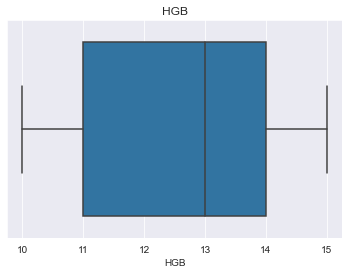

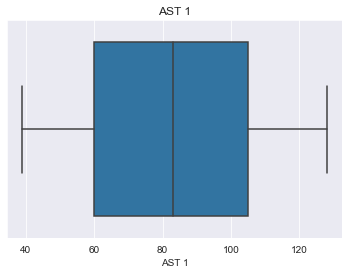

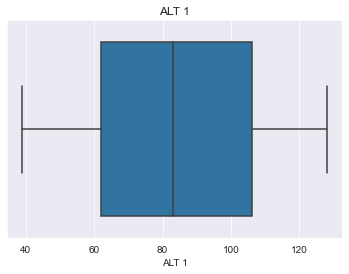

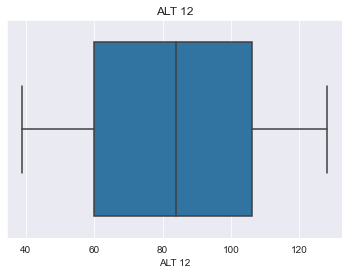

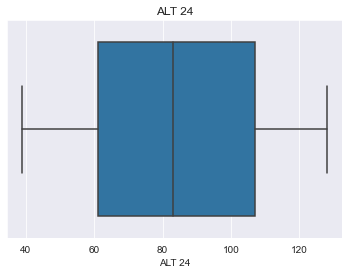

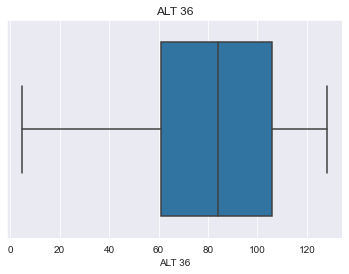

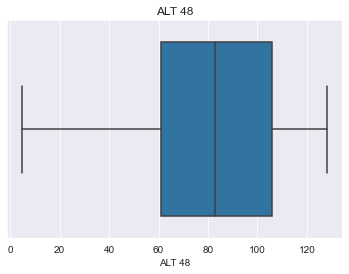

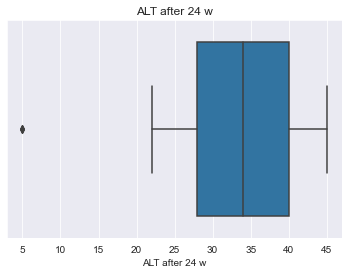

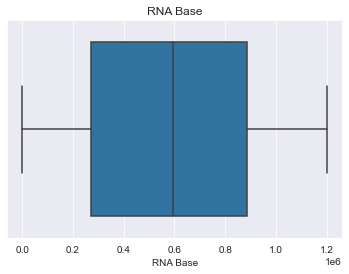

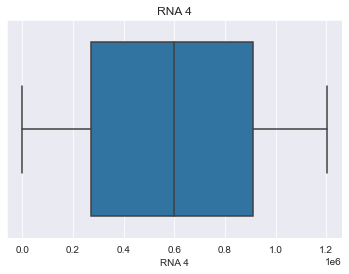

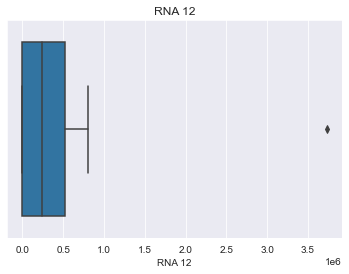

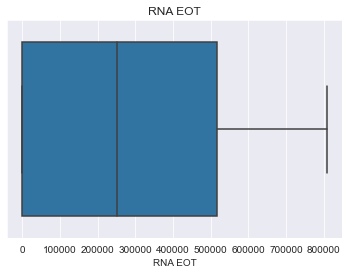

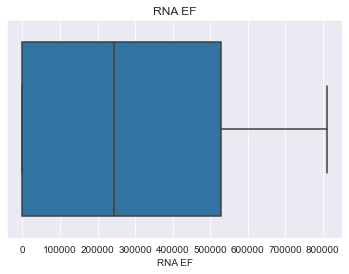

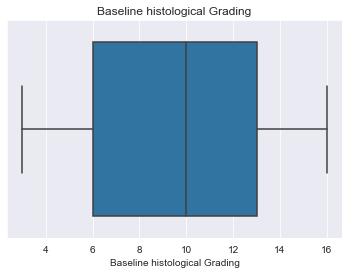

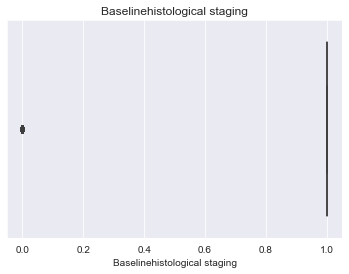

In [80]:
for i in df.columns:
    if (df[i].dtype)=='int64':
        sns.boxplot(df[i])
        plt.title(i)
        plt.show()

> From the above outliers graph we can conclude that only "RNA 12" and "ALT after 24 w" have outliers. but its not going to affect the dataset much as 

>HISTOGRAM

Text(0.5, 1.0, 'Histogram for Age')

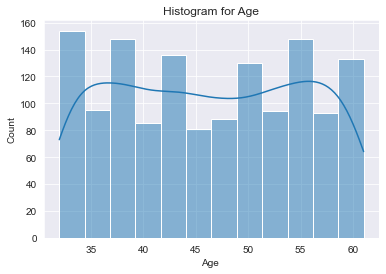

In [95]:
sns.histplot(df["Age "], kde=True)
plt.title(f"Histogram for Age")

>The graph shows that the column Age is not normally distributed. The kde= true shows the line in the graph.

Text(0.5, 1.0, 'Histogram for Gender')

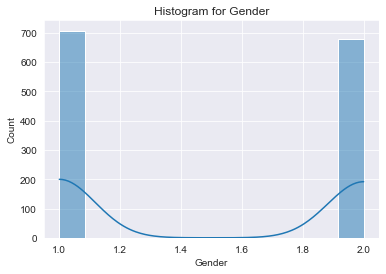

In [99]:
sns.histplot(df["Gender"], kde=True)
plt.title(f"Histogram for Gender")

>Similar to this graph of Gender, the other columns like Nausea/Vomting, Fever, Jaundice and all columns with 1 and 2 as entry will show the same garph.

Text(0.5, 1.0, 'Histogram for Plat')

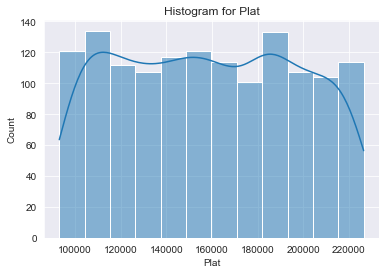

In [102]:
sns.histplot(df["Plat"], kde=True)
plt.title(f"Histogram for Plat")

Text(0.5, 1.0, 'Histogram for WBC')

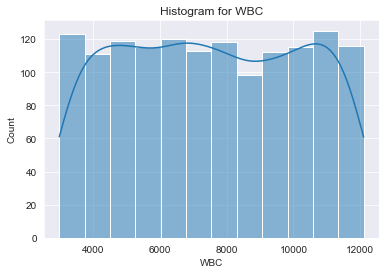

In [103]:
sns.histplot(df["WBC"], kde=True)
plt.title(f"Histogram for WBC")

Text(0.5, 1.0, 'Histogram for RBC')

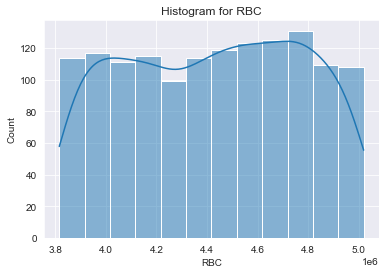

In [104]:
sns.histplot(df["RBC"], kde=True)
plt.title(f"Histogram for RBC")

Text(0.5, 1.0, 'Histogram for Plat')

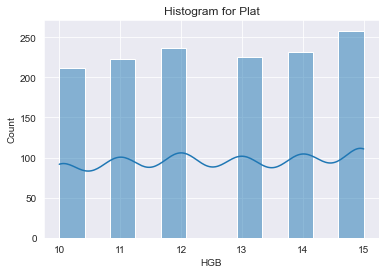

In [105]:
sns.histplot(df["HGB"], kde=True)
plt.title(f"Histogram for HGB")

>Here,in the above 4 graphs "HGB" shows the different pattern like a wave as compared to other ones.For the rest of them,
for some range they are normally distributed but for others they are not.

In [ ]:
AST 1                               0
ALT 1                               0
ALT4                                0
ALT 12                              0
ALT 24                              0
ALT 36                              0
ALT 48                              0
ALT after 24 w  

Text(0.5, 1.0, 'Histogram for ALT1')

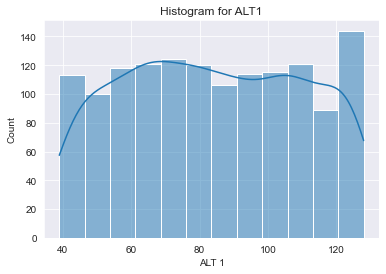

In [118]:
sns.histplot(df["ALT 1"], kde=True)
plt.title(f"Histogram for ALT1")

Text(0.5, 1.0, 'Histogram for ALT4')

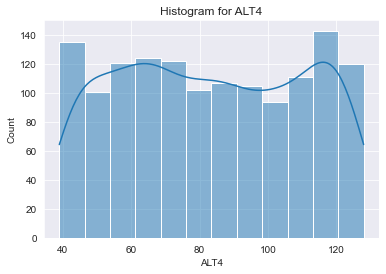

In [119]:
sns.histplot(df["ALT4"], kde=True)
plt.title(f"Histogram for ALT4")

Text(0.5, 1.0, 'Histogram for ALT 12')

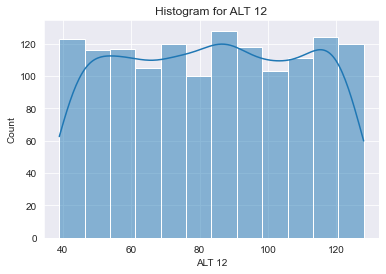

In [120]:
sns.histplot(df["ALT 12"], kde=True)
plt.title(f"Histogram for ALT 12")

Text(0.5, 1.0, 'Histogram for HGB')

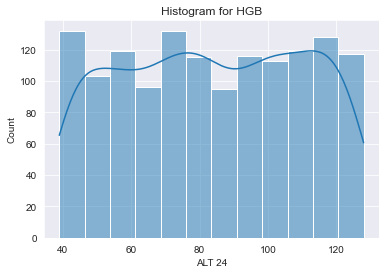

In [121]:
sns.histplot(df["ALT 24"], kde=True)
plt.title(f"Histogram for HGB")

>From the above figures of ALT we can see that all of them follow almost same pattern. 

Text(0.5, 1.0, 'Histogram for 24w')

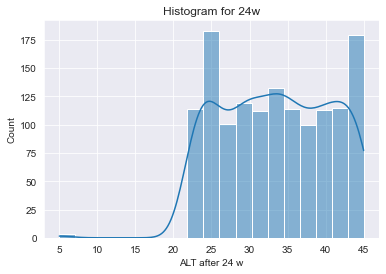

In [123]:
sns.histplot(df["ALT after 24 w"], kde=True)
plt.title(f"Histogram for 24w")

>Here for some points the value is too and for others its moderate.

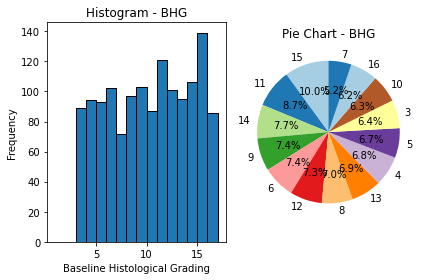

In [14]:
plt.subplot(1, 2, 1)
plt.hist(df['Baseline histological Grading'], bins=range(1, 18), edgecolor='black')
plt.title('Histogram - BHG')
plt.xlabel('Baseline Histological Grading')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
grading_counts = df['Baseline histological Grading'].value_counts()
plt.pie(grading_counts, labels=grading_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Pie Chart - BHG')

plt.tight_layout()
plt.show()

([<matplotlib.axis.XTick at 0x229c1c1fa30>,
 [Text(1, 0, 'Absent'), Text(2, 0, 'Present')])

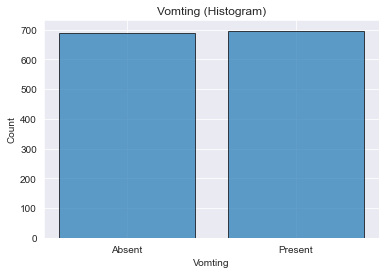

In [90]:
plt.hist(df['Nausea/Vomting'], bins=[0.5, 1.5, 2.5], edgecolor='black', alpha=0.7, rwidth=0.8)
plt.title('Vomting (Histogram)')
plt.xlabel('Vomting')
plt.ylabel('Count')
plt.xticks([1, 2], ['Absent', 'Present'])

>Here we can conclude that almost same number of people are having absence and presence of nausea.

# Bivariate Analysis

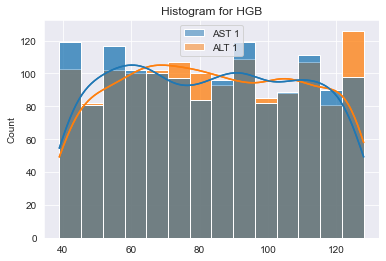

In [129]:
column=["AST 1","ALT 1"]
col=df[column]
for i in col:
    sns.histplot(col, kde=True)
    plt.title(f"Histogram for HGB")

In [ ]:
>The AST1 and ALT1 have almost equal number of counts.

<AxesSubplot:xlabel='BMI', ylabel='Baselinehistological staging'>

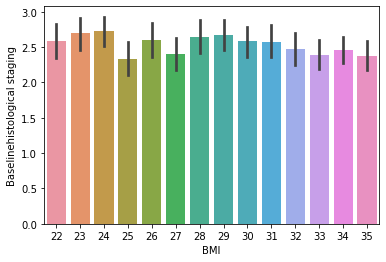

In [12]:
sns.barplot(df["BMI"],df["Baselinehistological staging"])

>People of standard BMI like 25,27 are less prone to disease but with less BMI are more affected from it.

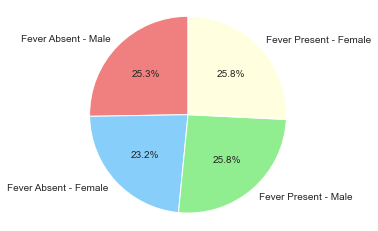

In [131]:
counts = df.groupby(['Fever', 'Gender']).size().unstack()

labels = ['Fever Absent - Male', 'Fever Absent - Female', 'Fever Present - Male', 'Fever Present - Female']
colors = ['lightcoral', 'lightskyblue', 'lightgreen', 'lightyellow']

fig, ax = plt.subplots()
ax.pie(counts.values.flatten(), labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
ax.axis('equal')  
plt.show()


>More people are prone to fever in over all but in particular women are more affected.

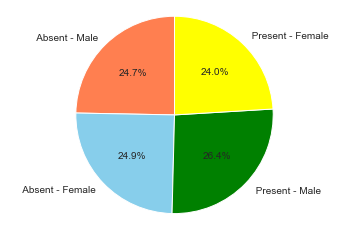

In [134]:
counts = df.groupby(['Epigastric pain ', 'Gender']).size().unstack()

labels = [' Absent - Male', ' Absent - Female', ' Present - Male', ' Present - Female']
colors = ['coral', 'skyblue', 'green', 'yellow']

fig, ax = plt.subplots()
ax.pie(counts.values.flatten(), labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
ax.axis('equal')  
plt.show()

>In toltal number of female the problem of Epigastric pain is present and absent equally. But in case of male, more people are prone to this symptom. 

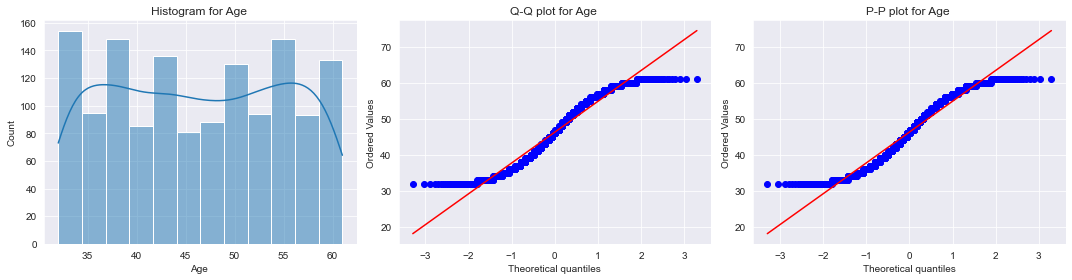

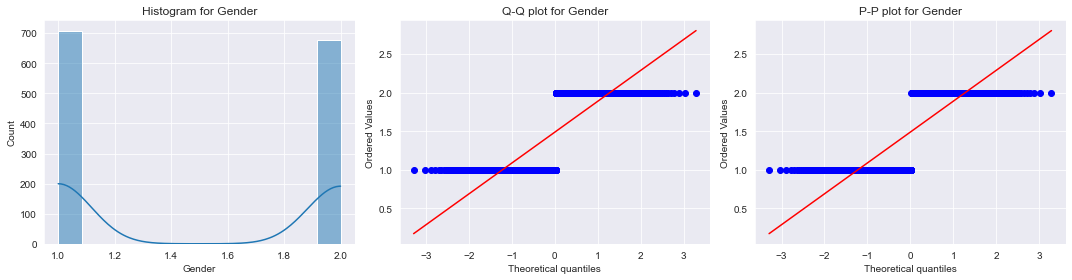

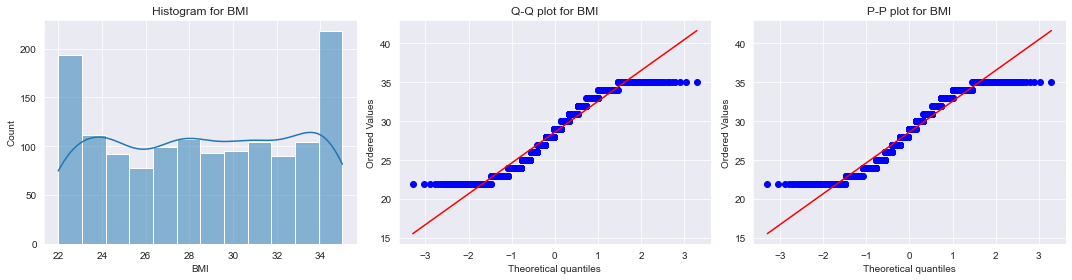

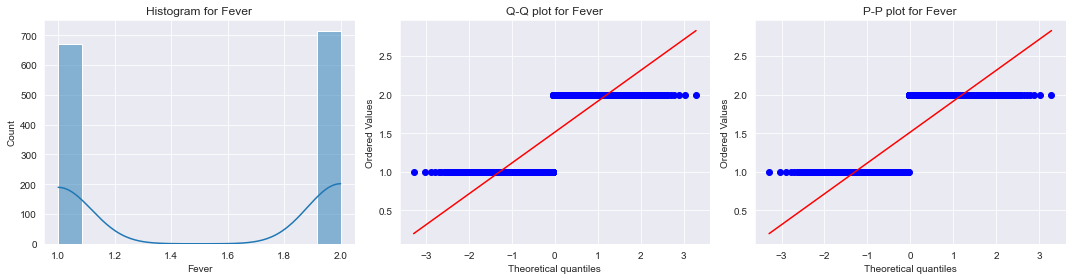

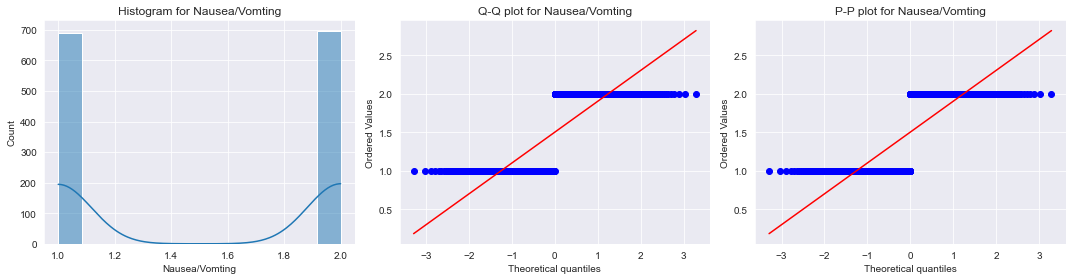

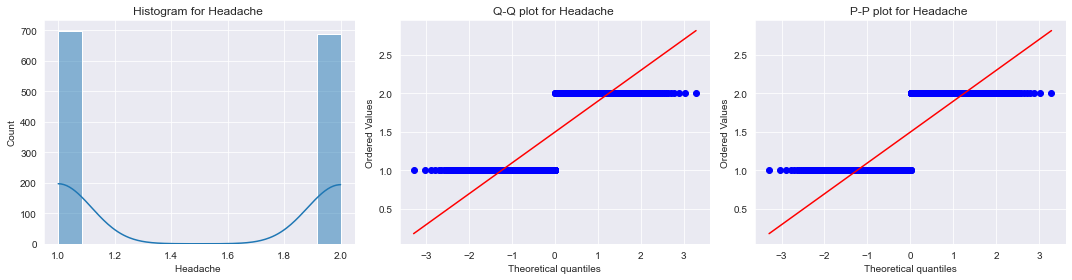

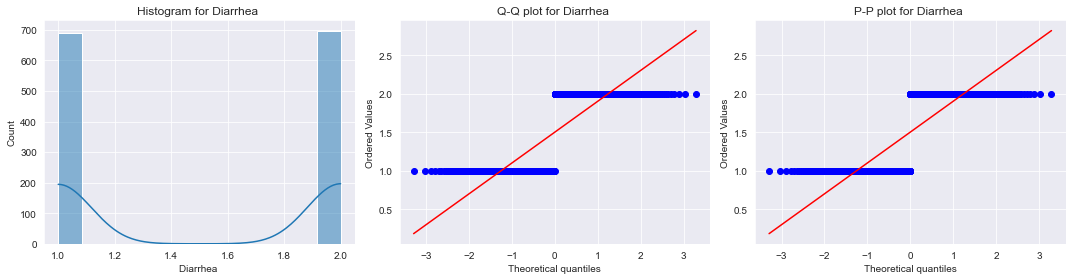

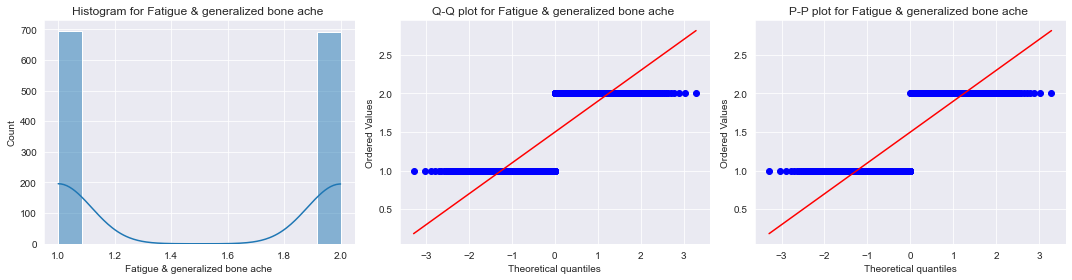

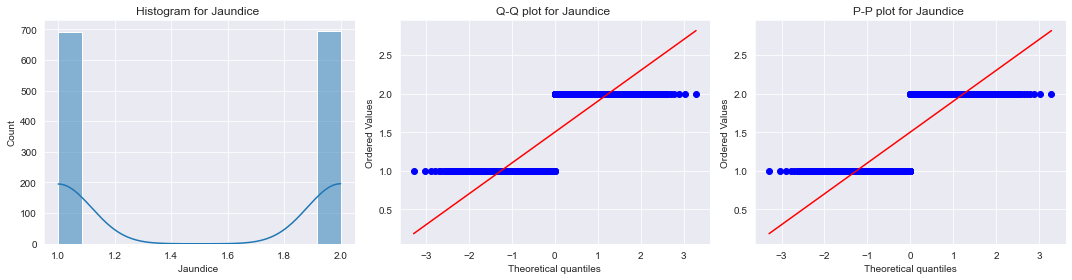

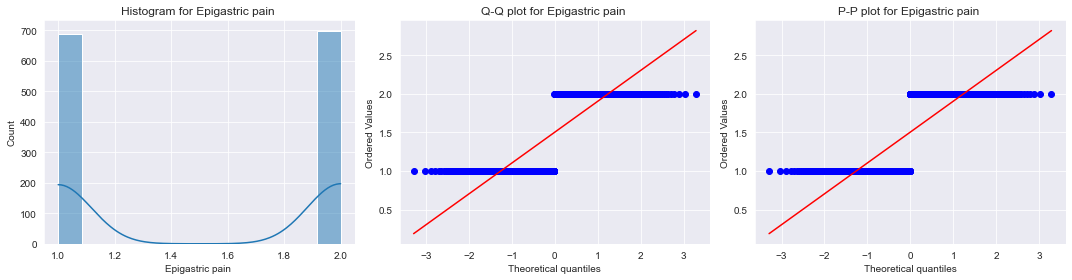

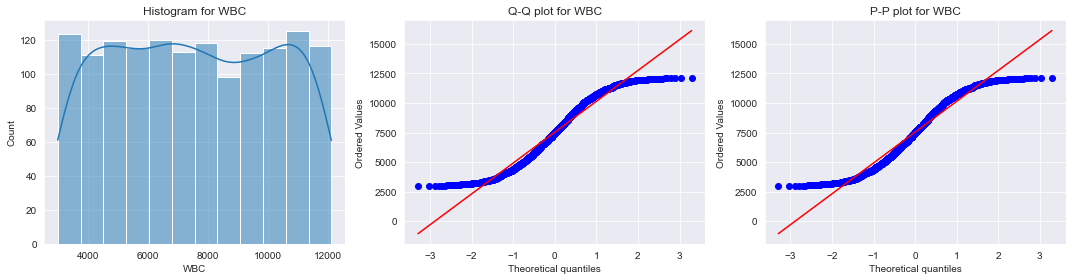

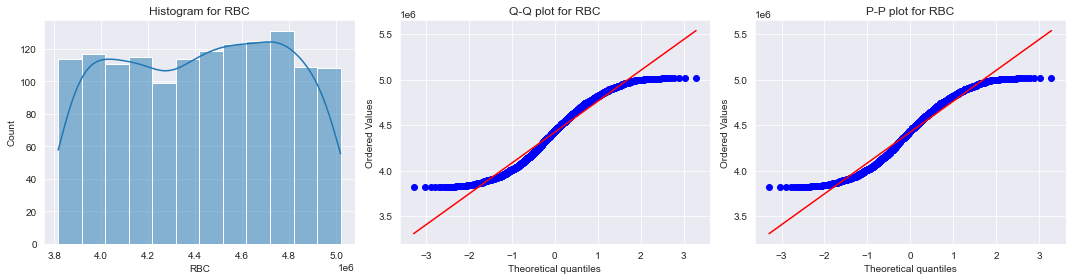

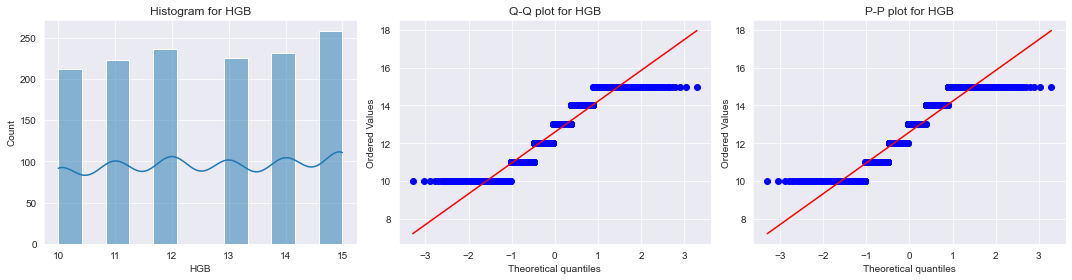

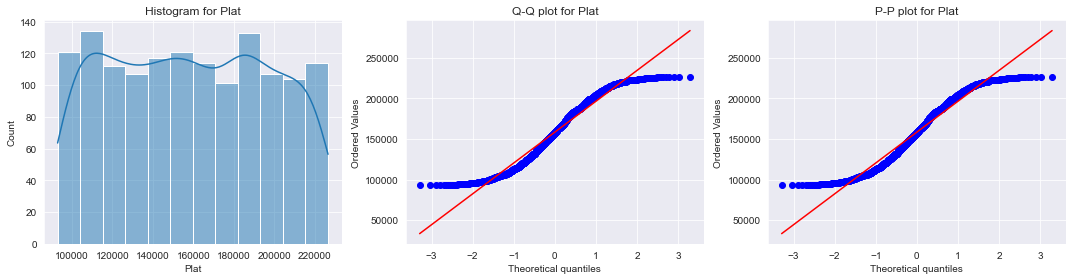

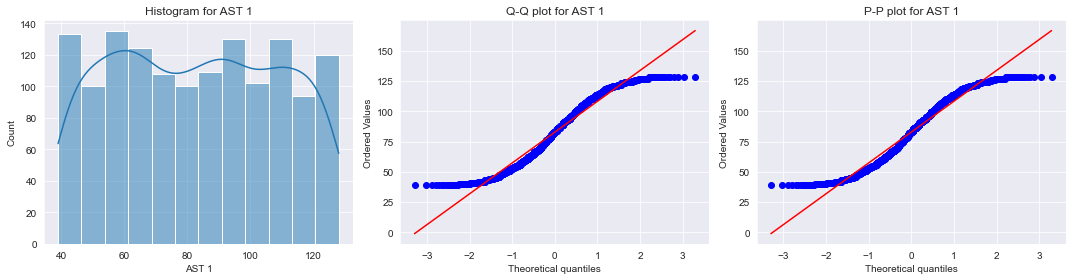

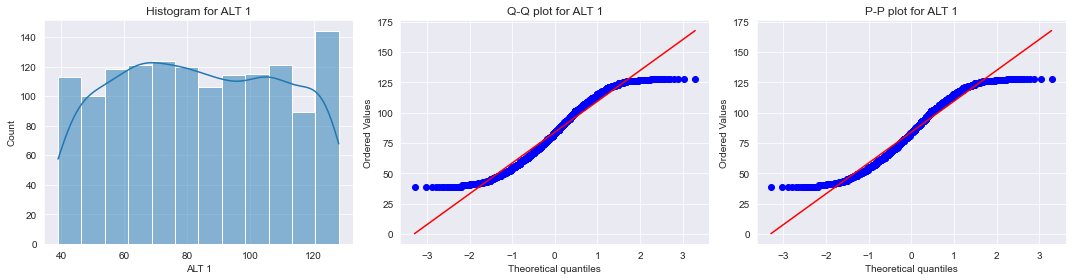

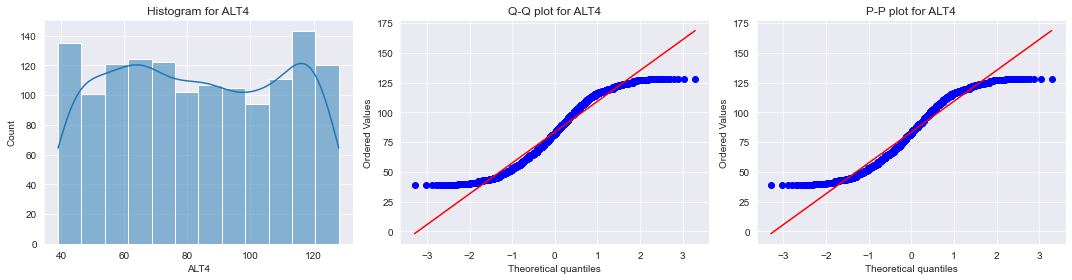

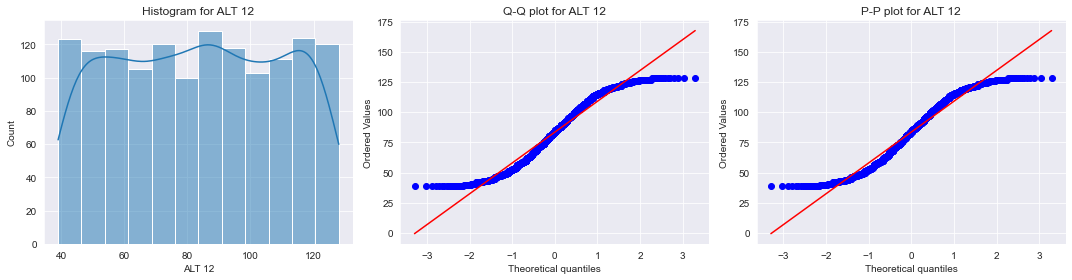

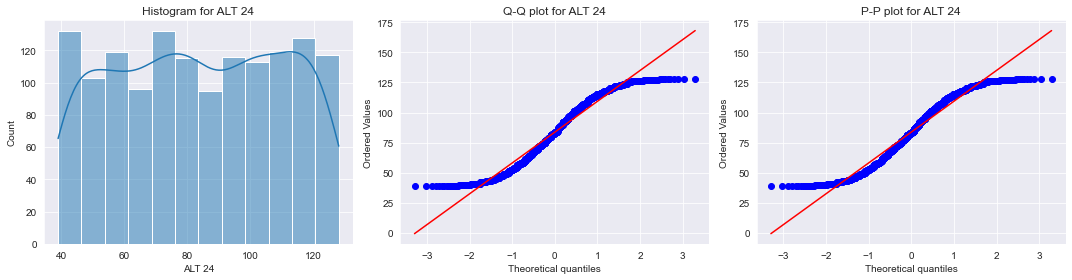

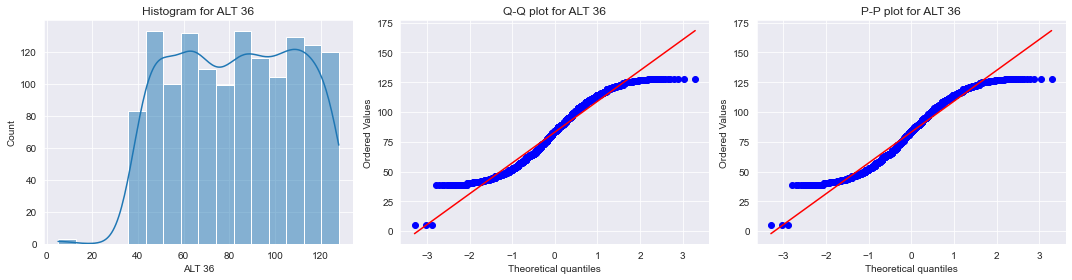

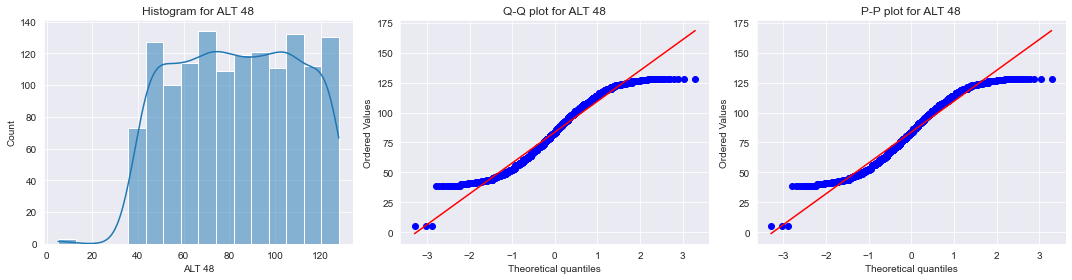

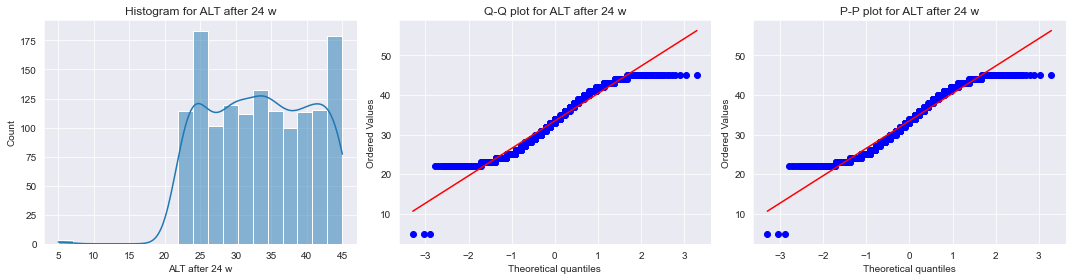

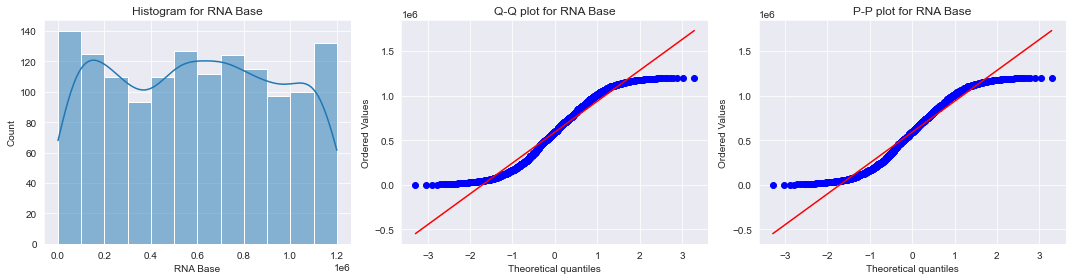

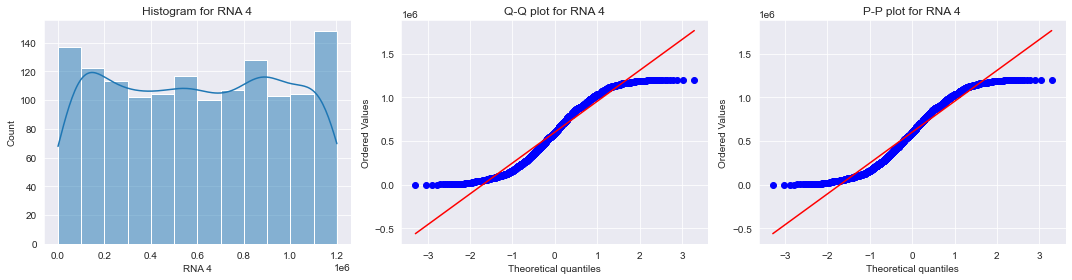

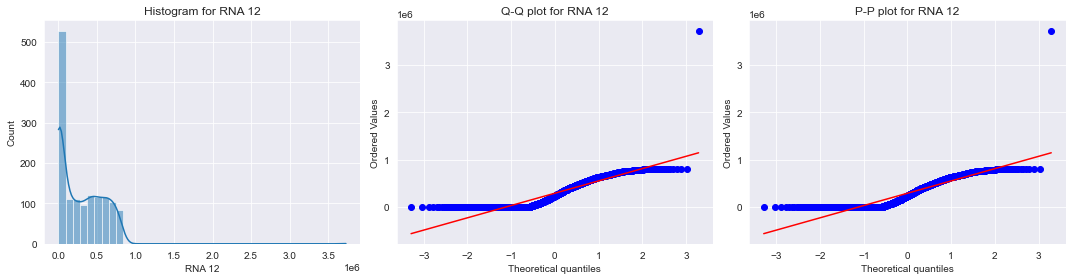

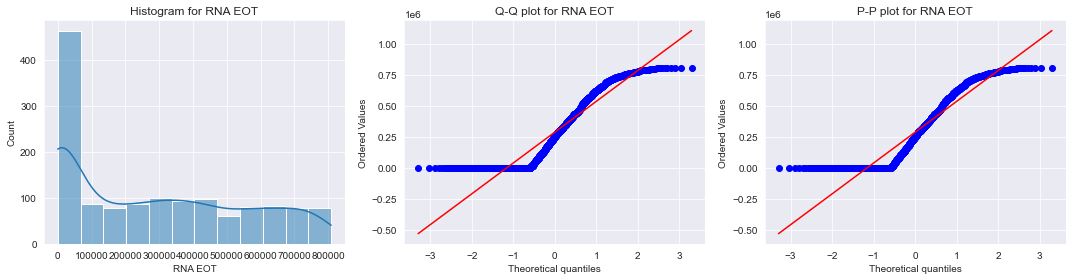

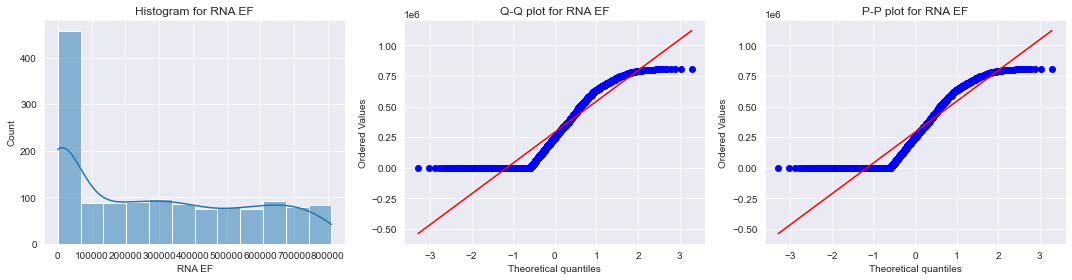

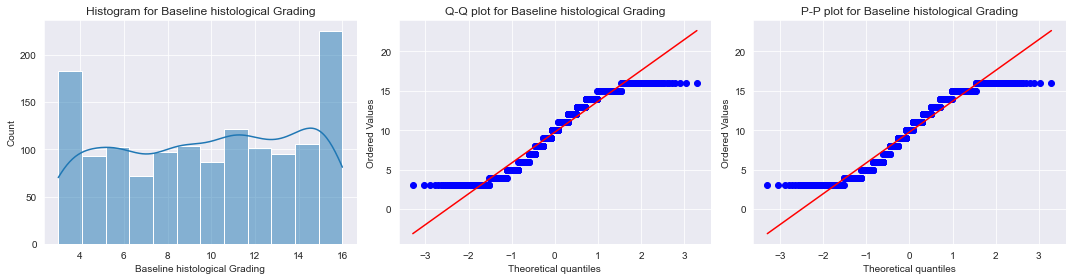

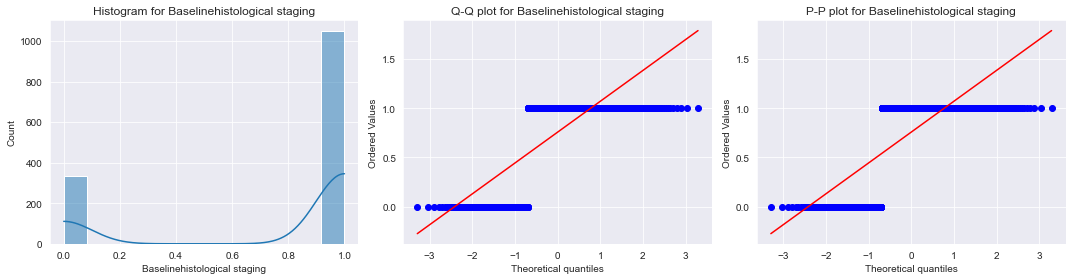

In [111]:
for column in df.columns:
    plt.figure(figsize=(15, 4))

    # Histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[column], kde=True)
    plt.title(f"Histogram for {column}")

    # Q-Q plot
    plt.subplot(1, 3, 2)
    probplot(np.array(df[column]), plot=plt)
    plt.title(f"Q-Q plot for {column}")

    # P-P plot
    plt.subplot(1, 3, 3)
    probplot(np.array(df[column]), dist='norm', plot=plt)
    plt.title(f"P-P plot for {column}")

    plt.tight_layout()
    plt.show()

In [ ]:
#Multivariate Analysis

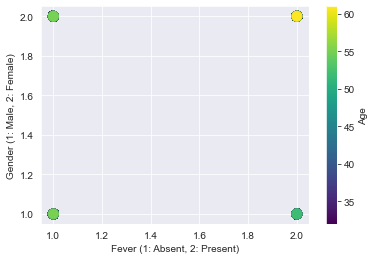

In [135]:
fig, ax = plt.subplots()
scatter = ax.scatter(df['Fever'], df['Gender'], c=df['Age '], cmap='viridis', s=100)

cbar = plt.colorbar(scatter)
cbar.set_label('Age')

ax.set_xlabel('Fever (1: Absent, 2: Present)')
ax.set_ylabel('Gender (1: Male, 2: Female)')

plt.show()


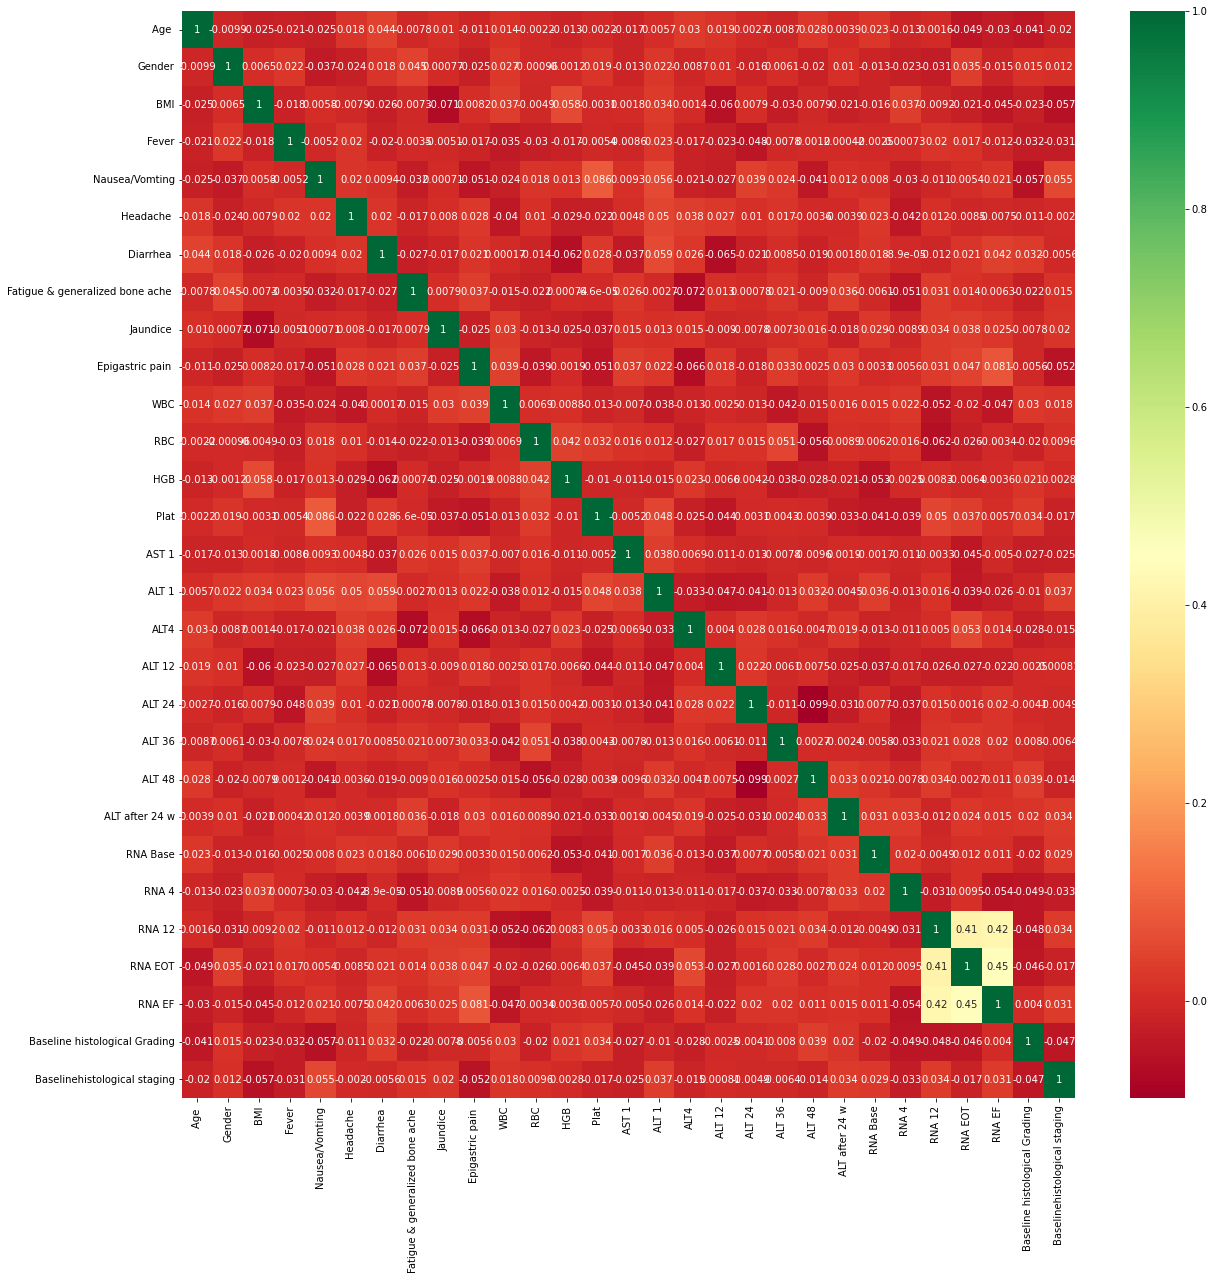

In [18]:
import seaborn as sns
correlation = df.corr()
top_corr_features = correlation.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

>This heatmap shows the correlation between the columns with every column. Since most of them are red in colour which 
shows poor correlation

In [140]:
import pandas as pd

correlation_matrix = df.corr()["Baselinehistological staging"].sort_values(ascending=False)

print(correlation_matrix)

Baselinehistological staging        1.000000
Nausea/Vomting                      0.043286
Jaundice                            0.038283
ALT 1                               0.032556
Fatigue & generalized bone ache     0.022356
RNA 12                              0.018724
Age                                 0.015011
ALT after 24 w                      0.008637
ALT 48                              0.007746
WBC                                 0.007659
Plat                                0.007291
RBC                                 0.004080
Gender                              0.001625
BMI                                 0.001038
RNA Base                            0.000742
ALT4                               -0.000232
RNA EF                             -0.003111
ALT 12                             -0.007530
AST 1                              -0.007694
Headache                           -0.007864
RNA 4                              -0.010486
HGB                                -0.013299
ALT 24    

>The values given above shows the expect to which all of the are related to target colum i.e "Baselinehistological staging".
AS we can see Nausea/Vomting shows the highest correlation with the target column.

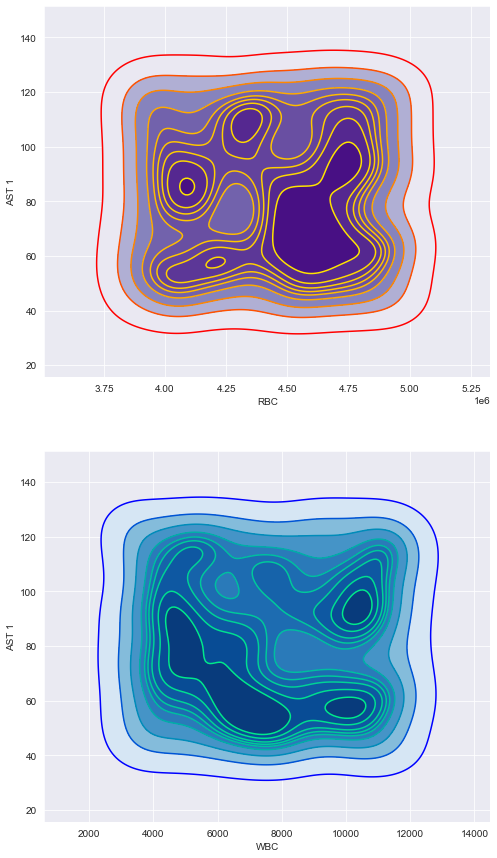

In [21]:
sns.set_style("darkgrid")
fig,axis=plt.subplots(2,1,figsize=(8,15))

RBCASTplt=sns.kdeplot(df['RBC'],df['AST 1'],cmap="Purples",shade=True,shade_lowest=False,ax=axis[0])
RBCASTpltcontour=sns.kdeplot(df['RBC'],df['AST 1'],cmap="autumn",ax=axis[0])

WBCASTplt=sns.kdeplot(df['WBC'],df['AST 1'],cmap="Blues",shade=True,shade_lowest=False,ax=axis[1])
WBCASTpltcontour=sns.kdeplot(df['WBC'],df['AST 1'],cmap="winter",ax=axis[1])

In [ ]:
>The KDE plots show the estimated distribution of data points for each pair of variables.
Darker regions indicate higher density, providing insights into where most data points are concentrated.
The KDE plot is more concentrated in certain areas and that suggest a correlation between the two variables.
The RBC Disribution across the AST enzyme is quiet concentrated at the values within range (40-100) with about range (40m-48m)
RBC While the WBC Distributed at values within range(4k-15k)WB.

# Feature selection

In [22]:
feature=["BMI","Fever","Diarrhea ", "Epigastric pain ","WBC","HGB", "Plat", "ALT 1", "ALT4", "ALT 24", "RNA Base", "RNA 4","RNA EF"]
X=df[feature]      
X      
#["Age","BMI", "RNA EF", "RNA EOT", "RNA 12", "RNA 4", "RNA Base", "ALT 1", "ALT 4","WBC", "HGB", "Plat", "ALT 24"]

,BMI,Fever,Diarrhea,Epigastric pain,WBC,HGB,Plat,ALT 1,ALT4,ALT 24,RNA Base,RNA 4,RNA EF
0,35,2,1,2,7425,14,112132.0,84,52.0,81,655330,634536,5
1,29,1,1,1,12101,10,129367.0,123,95.0,113,40620,538635,31085
2,33,2,2,1,4178,12,151522.0,49,95.0,116,571148,661346,558829
3,33,1,2,1,6490,10,146457.0,64,109.0,88,1041941,449939,582301
4,32,1,1,2,3661,11,187684.0,104,67.0,120,660410,738756,242861
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1380,29,1,2,1,7044,15,202520.0,59,78.0,127,387795,55938,5
1381,34,1,1,1,6207,10,115776.0,102,65.0,108,481378,152961,236273
1382,26,2,1,1,4913,14,128354.0,93,123.0,116,612664,572756,160457
1383,29,2,2,1,7257,10,205908.0,97,104.0,47,139872,76161,696074


In [23]:
y = df["Baselinehistological staging"]

>Taking the last column as target column and keeping it with y so as to do the further training and testing part

In [24]:
df['Baselinehistological staging'].replace([1],[0],inplace=True)
df['Baselinehistological staging'].replace([2],[1],inplace=True)
df['Baselinehistological staging'].replace([3],[1],inplace=True)
df['Baselinehistological staging'].replace([4],[1],inplace=True)

>Here converting the target variable to binary can enhance interpretability.
>Binary classification makes it easierto understand the accuracy, precision, recall, and F1 score.
>So, I converted the target variable into binary where 0 means "Hepatitis" and 1 represents "Non-Hepatitis"

In [25]:
df['Baselinehistological staging'].value_counts()

1    1049
0     336
Name: Baselinehistological staging, dtype: int64

# Scaling

In [26]:
robust_sc = preprocessing.RobustScaler()
standard_sc = preprocessing.StandardScaler() 
minmax_sc = preprocessing.MinMaxScaler()

In [27]:
from sklearn.metrics import f1_score
for x in [robust_sc,standard_sc,minmax_sc]:
    %time
    resultado = []
    scaler = x.fit(X)
    X_new = x.transform(X)
    tree = DecisionTreeClassifier(max_depth=25,random_state=42)
    tree.fit(X_new,y)
    y_pred = tree.predict(X_new)
    f1sc=f1_score(y, y_pred, average='weighted')
    rauc=(y, y_pred)
    resultado.append(f1sc)
    print("The scaling used--->",x)
    print("f1 according to the type of strategy:",f1sc)
    print("----------------------------------------")

CPU times: total: 0 ns
Wall time: 0 ns
The scaling used---> RobustScaler()
f1 according to the type of strategy: 1.0
----------------------------------------
CPU times: total: 0 ns
Wall time: 0 ns
The scaling used---> StandardScaler()
f1 according to the type of strategy: 1.0
----------------------------------------
CPU times: total: 0 ns
Wall time: 0 ns
The scaling used---> MinMaxScaler()
f1 according to the type of strategy: 1.0
----------------------------------------


In [28]:
smote_sampler = SMOTE(random_state=42)
X, y = smote_sampler.fit_resample(X, y)

>We are using SMOTE here to make the count of classes same in the target

In [29]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)

In [30]:
y_train.value_counts()

0    734
1    734
Name: Baselinehistological staging, dtype: int64

>Here The count of both the classes became equal because of using SMOTE

In [31]:
X_train

,BMI,Fever,Diarrhea,Epigastric pain,WBC,HGB,Plat,ALT 1,ALT4,ALT 24,RNA Base,RNA 4,RNA EF
368,22,2,1,1,3205,10,209664.000000,87,52.000000,100,103566,1161260,37937
185,32,2,1,1,5859,10,102771.000000,88,48.000000,127,268171,1093265,501110
661,34,2,2,1,6666,12,160130.000000,109,78.000000,45,434189,564698,375682
1468,25,1,1,1,4459,14,133881.822049,117,89.451284,86,1188814,195202,644181
78,31,2,2,1,4250,11,220661.000000,55,127.000000,46,170527,1088486,433726
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1366,30,1,1,2,8493,12,156825.000000,47,82.000000,115,680646,572994,5
1216,24,2,1,2,3537,15,112916.000000,95,48.000000,77,499369,542824,192927
499,34,1,2,2,4303,15,198928.000000,65,102.000000,43,741842,277289,56784
1380,29,1,2,1,7044,15,202520.000000,59,78.000000,127,387795,55938,5


In [32]:
X_train=standard_sc.fit_transform(X_train)
X_test=standard_sc.transform(X_test)

In [33]:
def confusion(y_test,y_test_pred,X):
    names=['Non Hepatitis','Hepatitis']
    cm=confusion_matrix(y_test,y_test_pred)
    f,ax=plt.subplots(figsize=(10,10))
    sns.heatmap(cm,annot=True,linewidth=.5,linecolor="r",fmt=".0f",ax=ax)
    plt.title(X, size = 25)
    plt.xlabel("y_pred")
    plt.ylabel("y_true")
    ax.set_xticklabels(names)
    ax.set_yticklabels(names)
    plt.show()

    return

# Model Building

# ANN

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from tensorflow import keras
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(2, activation='softmax') 
])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [34]:
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1)
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

Epoch 1/100
42/42 [==============================] - 2s 12ms/step - loss: 0.7007 - accuracy: 0.5405 - val_loss: 0.6521 - val_accuracy: 0.6259
Epoch 2/100
42/42 [==============================] - 0s 4ms/step - loss: 0.6585 - accuracy: 0.6064 - val_loss: 0.6386 - val_accuracy: 0.6463
Epoch 3/100
42/42 [==============================] - 0s 4ms/step - loss: 0.6404 - accuracy: 0.6283 - val_loss: 0.6364 - val_accuracy: 0.6803
Epoch 4/100
42/42 [==============================] - 0s 4ms/step - loss: 0.6294 - accuracy: 0.6593 - val_loss: 0.6371 - val_accuracy: 0.6667
Epoch 5/100
42/42 [==============================] - 0s 4ms/step - loss: 0.6175 - accuracy: 0.6669 - val_loss: 0.6386 - val_accuracy: 0.6531
Epoch 6/100
42/42 [==============================] - 0s 5ms/step - loss: 0.6053 - accuracy: 0.6790 - val_loss: 0.6413 - val_accuracy: 0.6463
Epoch 7/100
42/42 [==============================] - 0s 5ms/step - loss: 0.5914 - accuracy: 0.6972 - val_loss: 0.6383 - val_accuracy: 0.6463
Epoch 8/100


Epoch 59/100
42/42 [==============================] - 0s 4ms/step - loss: 0.1699 - accuracy: 0.9584 - val_loss: 0.8152 - val_accuracy: 0.6803
Epoch 60/100
42/42 [==============================] - 0s 5ms/step - loss: 0.1645 - accuracy: 0.9621 - val_loss: 0.7636 - val_accuracy: 0.6871
Epoch 61/100
42/42 [==============================] - 0s 5ms/step - loss: 0.1579 - accuracy: 0.9644 - val_loss: 0.7805 - val_accuracy: 0.6939
Epoch 62/100
42/42 [==============================] - 0s 5ms/step - loss: 0.1574 - accuracy: 0.9606 - val_loss: 0.8014 - val_accuracy: 0.6871
Epoch 63/100
42/42 [==============================] - 0s 4ms/step - loss: 0.1558 - accuracy: 0.9629 - val_loss: 0.7903 - val_accuracy: 0.6667
Epoch 64/100
42/42 [==============================] - 0s 5ms/step - loss: 0.1486 - accuracy: 0.9690 - val_loss: 0.8187 - val_accuracy: 0.6803
Epoch 65/100
42/42 [==============================] - 0s 5ms/step - loss: 0.1432 - accuracy: 0.9727 - val_loss: 0.7868 - val_accuracy: 0.7143
Epoch 

# Decision Tree

In [ ]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)

In [35]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)


In [36]:
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)

Accuracy: 0.6349206349206349

Confusion Matrix:
 [[209 106]
 [124 191]]

Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.66      0.65       315
           1       0.64      0.61      0.62       315

    accuracy                           0.63       630
   macro avg       0.64      0.63      0.63       630
weighted avg       0.64      0.63      0.63       630



# XGB Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from xgboost import XGBClassifier

In [37]:
xgb_model = XGBClassifier(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred1 = xgb_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred1)
conf_matrix = confusion_matrix(y_test, y_pred1)
classification_rep = classification_report(y_test, y_pred1)

In [38]:
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)

Accuracy: 0.7380952380952381

Confusion Matrix:
 [[240  75]
 [ 90 225]]

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.76      0.74       315
           1       0.75      0.71      0.73       315

    accuracy                           0.74       630
   macro avg       0.74      0.74      0.74       630
weighted avg       0.74      0.74      0.74       630



# SVM

In [39]:
svm_model = SVC(kernel='linear', decision_function_shape='ovr', random_state=42)
svm_model.fit(X_train, y_train)

In [ ]:
Y_pred4= svm_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, Y_pred4)
conf_matrix = confusion_matrix(y_test, Y_pred4)
classification_rep = classification_report(y_test, Y_pred4)

In [40]:
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)

Accuracy: 0.5793650793650794

Confusion Matrix:
 [[211 104]
 [161 154]]

Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.67      0.61       315
           1       0.60      0.49      0.54       315

    accuracy                           0.58       630
   macro avg       0.58      0.58      0.58       630
weighted avg       0.58      0.58      0.58       630



# knn

In [ ]:
knn = KNeighborsClassifier()
knn = knn.fit(X_train,y_train)

In [ ]:
pred = knn.predict(X_test)

In [41]:
from sklearn.metrics import confusion_matrix, accuracy_score
confusion_matrix(pred,y_test)
print(accuracy_score(pred, y_test))

0.653968253968254


In [ ]:
#Random Forest Classifier

In [42]:
RF = RandomForestClassifier(random_state=42)
RF.fit(X_train, y_train)

In [ ]:
pred1 = RF.predict(X_test)
score = RF.score(X_test,y_test)

In [43]:
score

0.7746031746031746

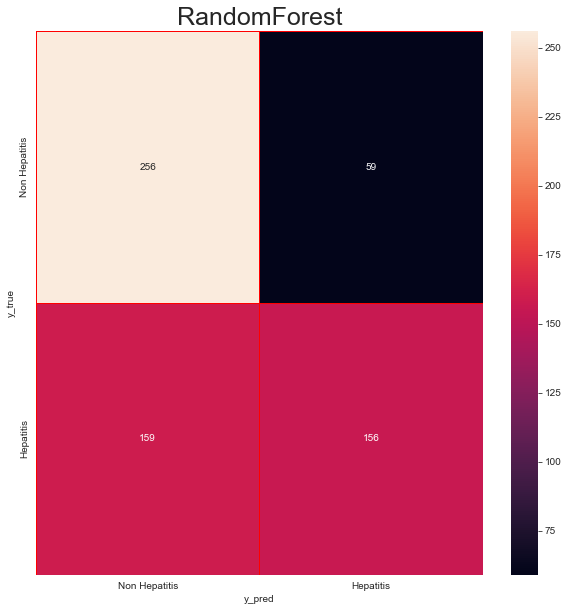

In [44]:
confusion(y_test,pred,"RandomForest")

>So we used various ML classification algorithms for the model building part. Even the ANN showed less accuracy but the Random 
Forest is giving better accuracy above all. 

# Hyperparameter Tuning

GridSearch CV

In [ ]:
from sklearn.model_selection import GridSearchCV
rf_classifier = RandomForestClassifier()


param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [ ]:
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Best Hyperparameters:", grid_search.best_params_)

In [ ]:
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on Test Set:", accuracy)

Using Randomized Search CV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

rf_classifier = RandomForestClassifier()


In [ ]:
param_dist = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [ ]:
random_search = RandomizedSearchCV(estimator=rf_classifier, param_distributions=param_dist, n_iter=10, cv=3, scoring='accuracy', random_state=42)
random_search.fit(X_train, y_train)

In [53]:
print("Best Hyperparameters:", random_search.best_params_)

best_model = random_search.best_estimator_

accuracy = best_model.score(X_test, y_test)
print("Accuracy on Test Set:", accuracy)


Best Hyperparameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': None}
Accuracy on Test Set: 0.780952380952381


In [73]:
pred= random_search.predict(X_test)

In [75]:
accuracy_score(pred,y_test)

0.780952380952381

In [76]:
confusion_matrix(pred,y_test)

array([[241,  64],
       [ 74, 251]], dtype=int64)

In [78]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       0.77      0.79      0.78       305
           1       0.80      0.77      0.78       325

    accuracy                           0.78       630
   macro avg       0.78      0.78      0.78       630
weighted avg       0.78      0.78      0.78       630



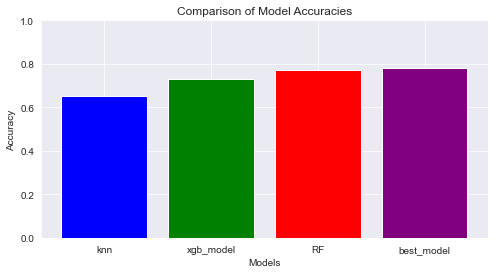

In [144]:
import matplotlib.pyplot as plt
import numpy as np

model_names = ['knn', 'xgb_model', 'RF',"best_model"]
accuracies = [0.65,0.73, 0.77,0.7809]

plt.figure(figsize=(8, 4))
plt.bar(model_names, accuracies, color=['blue', 'green', 'red','purple'])
plt.title('Comparison of Model Accuracies')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  
plt.show()


>AS we can see the Random Forest Classifier with RandomSearch cv gets the best accuracy of 78% above of all models.

## Testing

In [71]:
random_search.predict([[0.895838,1.114101,-0.844365,-0.887729,-0.664772,-1.531364,-1.500935,0.187086,-1.402204,1.723125,-0.943508,1.361242,0.770404]])

array([1], dtype=int64)

>We gave one rows data with the prediction part and it predicted correctly

In [55]:
y_pred=best_model.predict(X_test)

In [56]:
y_pred

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,

In [ ]:
X_test_10_points = X_test[:10]
y_test_10_points = y_test[:10]

In [ ]:
scaler = StandardScaler()

X_test_scaled = scaler.fit_transform(X_test_10_points)

predictions = random_search.predict(X_test_scaled)

print("Predictions for 10 data points:")
print(predictions)

In [83]:
binary_predictions = (predictions > 0.5).astype(int)

accuracy = accuracy_score(y_test_10_points, binary_predictions)

print("Accuracy for 10 data points:", accuracy)


Predictions for 10 data points:
[0 1 1 1 0 0 1 0 1 1]
Accuracy for 10 data points: 0.7


In [ ]:
X_test_21_points = X_test[:21]
y_test_21_points = y_test[:21]

In [ ]:
from sklearn.metrics import accuracy_score
X_test_scaled = scaler.fit_transform(X_test_21_points)

predictions = random_search.predict(X_test_scaled)

print("Predictions for 21 data points:")
print(predictions)

In [82]:
binary_predictions = (predictions > 0.5).astype(int)

accuracy = accuracy_score(y_test_21_points, binary_predictions)

print("Accuracy for 21 data points:", accuracy)


Predictions for 10 data points:
[0 1 1 1 0 1 1 1 1 1 0 1 0 0 0 1 1 0 0 0 0]
Accuracy for 10 data points: 0.7142857142857143


>Here we tried taking datapoints at a time for testing and after checking we are getting the accuracy as 71% for 21 datapoints 
that means for 71% of data points it is predicting accurately.

In [145]:
import pickle

In [150]:
# wb -> write book
# rb -> read book

pickle.dump(random_search,open("BHS_file.pkl","wb"))